<a href="https://colab.research.google.com/github/zoyafatima00/zoyafatima00-tasks_by_FusionFlareTech/blob/main/Cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. Create Kaggle Directory and Copy Kaggle API Key***

In [ ]:
!mkdir -p ~/.Kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


# ***2. Download Dataset from Kaggle***

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:07<00:00, 231MB/s]
100% 1.06G/1.06G [00:07<00:00, 160MB/s]


# ***3. Unzip the Dataset***

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


# ***4. Import Necessary Libraries***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, BatchNormalization, Dropout


# *5. Create Data Generators for Training and Validation*

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# ***6. Normalize the Data***

In [ ]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# ***7. Create the Convolutional Neural Network (CNN) Model***

In [ ]:
# create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

# ***8. Compile and Train the Model***

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.5524 - loss: 2.8517 - val_accuracy: 0.6524 - val_loss: 0.6323
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6651 - loss: 0.6254 - val_accuracy: 0.7250 - val_loss: 0.5502
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.7297 - loss: 0.5459 - val_accuracy: 0.7312 - val_loss: 0.5303
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7850 - loss: 0.4630 - val_accuracy: 0.7352 - val_loss: 0.5920
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.8109 - loss: 0.4136 - val_accuracy: 0.7682 - val_loss: 0.5318
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8370 - loss: 0.3669 - val_accuracy: 0.7868 - val_loss: 0.4889
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8652 - loss: 0.3000 - val_accuracy: 0.8158 - val_loss: 0.4122
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.9061 - loss: 0.2328 - 

# ***9. Plot Training and Validation Accuracy***

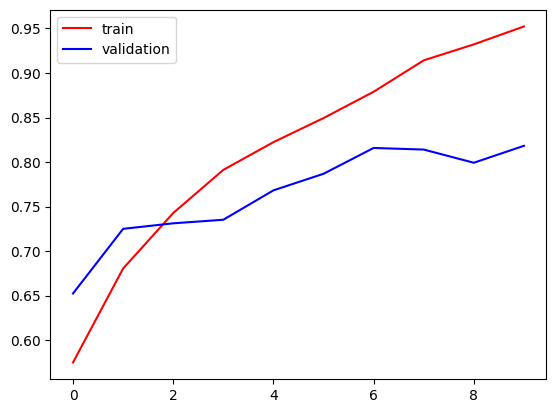

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

#This is the graph before reducing the overfitting

In [ ]:
#As thaere are are not results for validation so there are ways to reduce ovwefitting
# Batch Norm
# REduce complexity
#and many more


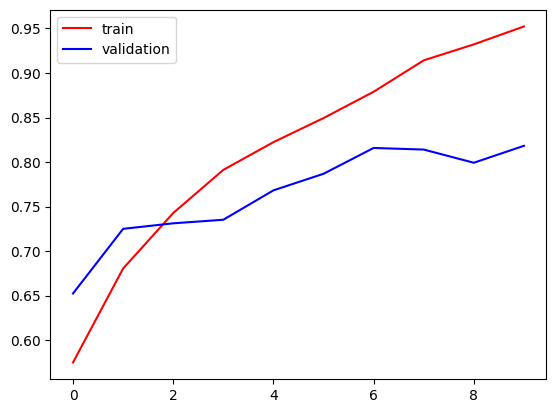

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

#This is the graph after reducing the overfitting

# ***10. Test the Model with an Image (Cat)***

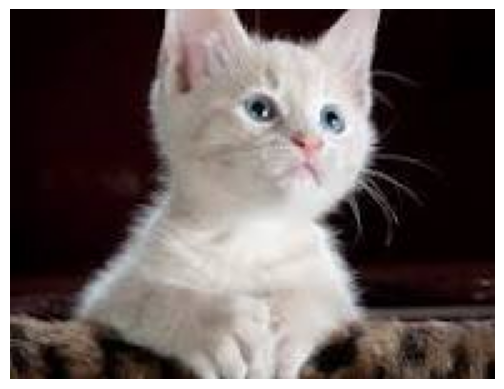

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
It is a cat


In [ ]:
import cv2

def predict_image(image_path):
    test_img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.show()

    test_img = cv2.resize(test_img, (256, 256))
    test_input = test_img.reshape((1, 256, 256, 3)) / 255.0

    prediction = model.predict(test_input)[0][0]

    if prediction < 0.5:
        print("It is a cat")
    else:
        print("It is a dog")

# Test the function with a cat image
predict_image('/content/cat.jpeg')

# ***11. Test the Model with an Image (Dog)***

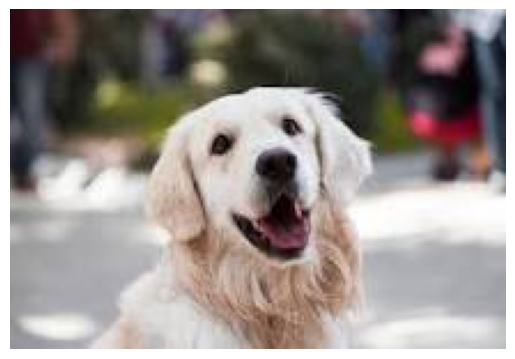

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
It is a dog


In [ ]:
predict_image('/content/dog.jpeg')

As It shows 0 whuch means it is a cat

In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import load_img, img_to_array

# Assuming `model` is already trained and loaded
# model = load_model('path_to_saved_model.h5')  # Use this if you saved your model

def display_result(result):
    # Determine the result message based on the prediction
    if result < 0.5:
        message = "The image is of a Cat!"
    else:
        message = "The image is of a Dog!"

    # Display the message in the notebook
    print("Prediction Result:", message)

def predict_image(image_path):
    # Read and display the image
    test_img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.show()

    # Resize the image to 256x256
    test_img = cv2.resize(test_img, (256, 256))

    # Preprocess the image
    test_input = test_img.reshape((1, 256, 256, 3)) / 255.0

    # Predict the class of the image
    result = model.predict(test_input)[0][0]

    # Display the result message
    display_result(result)



In [ ]:
# Test the function with a cat image
predict_image('/content/cat.jpeg')

In [ ]:
# Test the function with a dog image
predict_image('/content/dog.jpeg')

In [ ]:
model.save('cats_vs_dogs_model.h5')


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the Keras model
model = keras.models.load_model('cats_vs_dogs_model.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('cats_vs_dogs_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TensorFlow Lite format.")



In [ ]:
from google.colab import files
files.download('cats_vs_dogs_model.tflite')


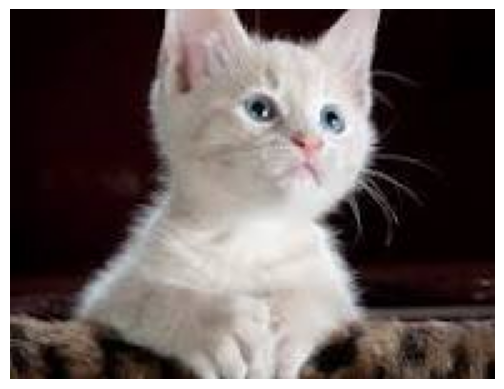

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
It is a cat


In [ ]:
import cv2

def predict_image(image_path):
    test_img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.show()

    test_img = cv2.resize(test_img, (256, 256))
    test_input = test_img.reshape((1, 256, 256, 3)) / 255.0

    prediction = model.predict(test_input)[0][0]

    if prediction < 0.5:
        print("It is a cat")
    else:
        print("It is a dog")

# Test the function with a cat image
predict_image('/content/cat.jpeg')